In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('Copy of HireArt - Data Analyst Exercise 10.12.17.xlsx')

In [3]:
# check data format and quality
print(data.head(2))
print(data.info())

  Account manager                 Client Name Date of Contact
0     Milan Crona     Wyman, Farrell and Haag      2015-10-31
1    Aidan Pouros  Veum, McClure and Schuster      2013-12-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.5+ KB
None


In [4]:
# extract the year and month from 'Date of Contact' column
data['year'] = data['Date of Contact'].dt.year
data['month'] = data['Date of Contact'].dt.month

# 1. Look at unique number of clients by month for all five years

In [5]:
# group by month and concatenate all clients associated with the same month together
bymonth = data.groupby('month')['Client Name'].apply(lambda x: ','.join(x)).reset_index()
bymonth.head()

,month,Client Name
0,1,"Anderson, Kutch and Hyatt,Franecki-Feil,Mitche..."
1,2,"Walter Inc,Donnelly-Champlin,Hoppe-Batz,Abbott..."
2,3,"Abbott Group,Armstrong Group,Veum, McClure and..."
3,4,"Fahey, Wunsch and Bashirian,Wyman, Farrell and..."
4,5,"Fahey, Wunsch and Bashirian,Sanford and Sons,E..."


In [6]:
# split the spring containing list of client names by ',' and 'and' and strip off whitespaces

def split_and_strip(text):
    """function that splits text by comma and 'and', then trims off whitespaces in each resulting word,
    and returns the list of splitted and trimmed words. 
    """
    text = text.replace('and',',')
    text = text.split(',')
    text = [t.strip() for t in text]
    return text
    
bymonth['clients'] = bymonth['Client Name'].apply(split_and_strip)
bymonth.head(2)

,month,Client Name,clients
0,1,"Anderson, Kutch and Hyatt,Franecki-Feil,Mitche...","[Anderson, Kutch, Hyatt, Franecki-Feil, Mitche..."
1,2,"Walter Inc,Donnelly-Champlin,Hoppe-Batz,Abbott...","[Walter Inc, Donnelly-Champlin, Hoppe-Batz, Ab..."


In [7]:
# convert the list of names to a set of unique client names
bymonth['unique_clients'] = bymonth.clients.apply(set)

# number of unique clients by month
bymonth['number_of_unique_clients'] = bymonth.unique_clients.apply(len)

# sort by the number of unique clients in descending order
bymonth.sort_values('number_of_unique_clients', ascending=False).head(12)

,month,Client Name,clients,unique_clients,number_of_unique_clients
9,10,"Wyman, Farrell and Haag,Oga, Gottlieb and Crui...","[Wyman, Farrell, Haag, Oga, Gottlieb, Cruicksh...","{Cormier LLC, Franecki-Feil, Howell, Hermiston...",65
5,6,"Brown, Wyman and Grimes,Hauck Group,Medhurst, ...","[Brown, Wyman, Grimes, Hauck Group, Medhurst, ...","{Cormier LLC, Howell, Franecki-Feil, Hermiston...",64
4,5,"Fahey, Wunsch and Bashirian,Sanford and Sons,E...","[Fahey, Wunsch, Bashirian, Sanford, Sons, Eich...","{Franecki-Feil, Cormier LLC, Howell, Hermiston...",63
7,8,"Hauck Group,Denesik, Stehr and Carter,Armstron...","[Hauck Group, Denesik, Stehr, Carter, Armstron...","{Cormier LLC, Howell, Franecki-Feil, Hermiston...",63
8,9,"Stamm-Crooks,Denesik, Stehr and Carter,Johnsto...","[Stamm-Crooks, Denesik, Stehr, Carter, Johnsto...","{Franecki-Feil, Howell, Hermiston, Ondricka-Wo...",63
1,2,"Walter Inc,Donnelly-Champlin,Hoppe-Batz,Abbott...","[Walter Inc, Donnelly-Champlin, Hoppe-Batz, Ab...","{Franecki-Feil, Cormier LLC, Howell, Hermiston...",57
10,11,"Armstrong Group,Mitchell and Sons,Johnston-Sch...","[Armstrong Group, Mitchell, Sons, Johnston-Sch...","{Franecki-Feil, Howell, Cormier LLC, Ondricka-...",57
0,1,"Anderson, Kutch and Hyatt,Franecki-Feil,Mitche...","[Anderson, Kutch, Hyatt, Franecki-Feil, Mitche...","{Franecki-Feil, Howell, Cormier LLC, Schuster,...",56
11,12,"Veum, McClure and Schuster,Veum, McClure and S...","[Veum, McClure, Schuster, Veum, McClure, Schus...","{Franecki-Feil, Cormier LLC, Hermiston, Ondric...",56
2,3,"Abbott Group,Armstrong Group,Veum, McClure and...","[Abbott Group, Armstrong Group, Veum, McClure,...","{Cormier LLC, Howell, Franecki-Feil, Ondricka-...",52


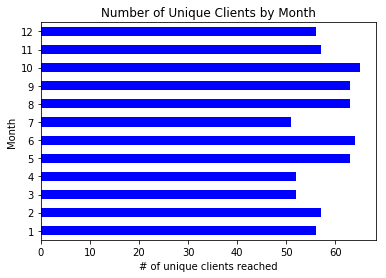

In [8]:
# look at barplot
bymonth.plot(x='month',y='number_of_unique_clients', kind='barh', color='blue', legend=None);
plt.xlabel('# of unique clients reached');
plt.ylabel('Month');
plt.title('Number of Unique Clients by Month');

October has the most number of unique clients.

# 2. Look at unique number of clients by month for each year

In [9]:
byyearmonth = data.groupby(['year','month'])['Client Name'].apply(lambda x: ','.join(x)).reset_index()
byyearmonth.head(2)

,year,month,Client Name
0,2013,10,"Oga, Gottlieb and Cruickshank,Cormier LLC,Ondr..."
1,2013,11,"Armstrong Group,Johnston-Schaden,Trantow Inc,S..."


In [10]:
# split the spring containing list of client names by ',' and 'and' and strip off whitespaces
byyearmonth['clients'] = byyearmonth['Client Name'].apply(split_and_strip)

In [11]:
# convert the list of names to a set of unique client names
byyearmonth['unique_clients'] = byyearmonth.clients.apply(set)

# number of unique clients by month
byyearmonth['number_of_unique_clients'] = byyearmonth.unique_clients.apply(len)

# sort by the number of unique clients in descending order
byyearmonth.sort_values('number_of_unique_clients', ascending=False).head()

,year,month,Client Name,clients,unique_clients,number_of_unique_clients
0,2013,10,"Oga, Gottlieb and Cruickshank,Cormier LLC,Ondr...","[Oga, Gottlieb, Cruickshank, Cormier LLC, Ondr...","{Cormier LLC, Franecki-Feil, Howell, Hermiston...",59
12,2014,10,"Donnelly-Champlin,Lemke-Pfannerstill,Kris, Sha...","[Donnelly-Champlin, Lemke-Pfannerstill, Kris, ...","{Cormier LLC, Howell, Hermiston, Ondricka-Wolf...",56
24,2015,10,"Wyman, Farrell and Haag,Ondricka-Wolff,Brown, ...","[Wyman, Farrell, Haag, Ondricka-Wolff, Brown, ...","{Franecki-Feil, Howell, Cormier LLC, Hermiston...",54
36,2016,10,"Franecki-Feil,Lueilwitz, Moore and Hahn,Lemke-...","[Franecki-Feil, Lueilwitz, Moore, Hahn, Lemke-...","{Franecki-Feil, Howell, Hermiston, Schuster, W...",48
47,2017,9,"Denesik, Stehr and Carter,Franecki-Feil,Mitche...","[Denesik, Stehr, Carter, Franecki-Feil, Mitche...","{Franecki-Feil, Howell, Hermiston, Schuster, O...",43


# 3. Conclusion

 
The aggregated count of unique customers by month based on the data in all five years shows that **October has the most number of unique clients**. 

In addition, to take into consideration the difference among years, the aggregated count of unique customers by month was also computed for each year and shown above. The result shows that **October has remained the month with the most unique clients consistently from 2013 to 2016** and no data is available for Oct, 2017 yet.

These historical data suggest that **the team tends to contact the greatest percentage of its clients in October, which would be a nice time for announcing the product upgrade.**